In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': # MAC
    plt.rc('font', family='AppleGothic')
else: # Windows
    plt.rc('font', family='Malgun Gothic')

import pandas as pd
import numpy as np
import FinanceDataReader as fdr

def create_rtn_by_ticker(
    ticker,
    _start=None,
    _end='2023-01-15',
    _roll_buy = 8,
    _roll_sell = 2
):
    df = fdr.DataReader(ticker, _start, _end)
    df['year'] = df.index.year

    df['Buy'] = df['Open'].shift(_roll_buy-1) # 연말장 종료 (_roll_buy)일전 Open
    df['Sell'] = df['Close'].shift(-_roll_sell) # 연초 (_roll_sell) 영업일 Close

    # 연말장 종료일 기준 수익률 계산
    df_change = df[df['year'] != df['year'].shift(-1)][:-1] # 연말 데이터 추출
    df_change.set_index('year', inplace=True)
    df_change['rtn'] = df_change['Sell'] / df_change['Buy']
    df_change['rtn(%)'] = (df_change['rtn']-1)*100 # %
    df_change = df_change[['Buy', 'Sell', 'rtn', 'rtn(%)']]

    # inf 제거
    df_change = df_change[~df_change.isin([np.inf]).any(axis=1)]

    # 시각화
    colors = list(map(lambda x: 'red' if x > 0 else 'blue', df_change['rtn(%)']))

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('year')
    ax1.set_ylabel('rtn(%)')
    ax1.bar(df_change.index, df_change['rtn(%)'], color=colors)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel('price')  # Sell(close)
    ax2.plot(df_change.index, df_change['Sell'], color='green', linestyle='--', label='price(sell)')
    ax2.plot(df_change.index, df_change['Buy'], color='orange', linestyle='--', label='price(buy)')
    ax2.tick_params(axis='y')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f"종목명:{ticker}, 누적수익률:{np.round(df_change['rtn'].cumprod().iloc[-1], 4)}")
    plt.legend()
    plt.show()

    return df_change

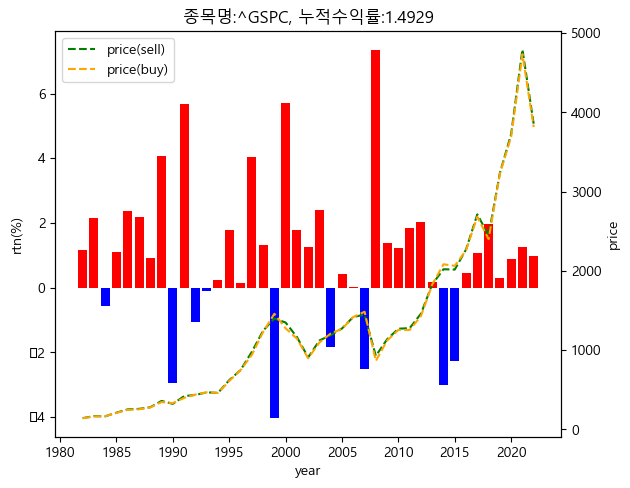

,Buy,Sell,rtn,rtn(%)
year,,,,
1982,139.729996,141.360001,1.011665,1.166539
1983,163.270004,166.779999,1.021498,2.149810
1984,165.509995,164.570007,0.994321,-0.567934
1985,208.570007,210.880005,1.011075,1.107541
1986,246.339996,252.190002,1.023748,2.374769
1987,253.130005,258.630005,1.021728,2.172797
1988,276.869995,279.429993,1.009246,0.924621
1989,344.779999,358.760010,1.040548,4.054763
1990,331.739990,321.910004,0.970368,-2.963160


In [3]:
create_rtn_by_ticker(
    ticker = '^GSPC',
    _start=None,
    _end='2023-01-15',
    _roll_buy = 5,
    _roll_sell = 2
)

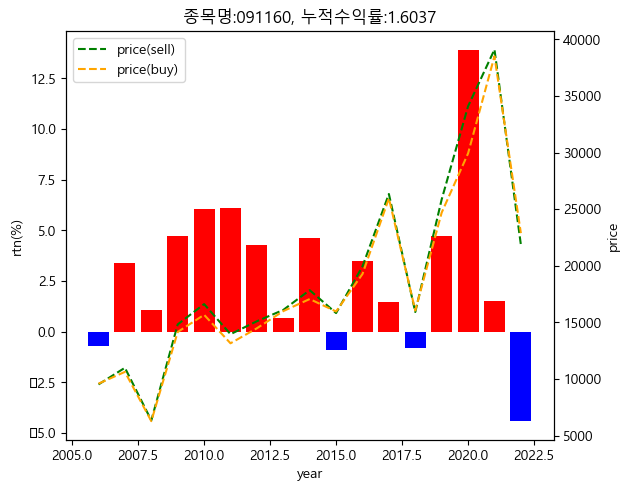

,Buy,Sell,rtn,rtn(%)
year,,,,
2006,9597.0,9529.0,0.992914,-0.708555
2007,10635.0,10996.0,1.033945,3.394452
2008,6286.0,6353.0,1.010659,1.065861
2009,14155.0,14825.0,1.047333,4.733310
2010,15674.0,16620.0,1.060355,6.035473
2011,13158.0,13961.0,1.061028,6.102751
2012,14484.0,15105.0,1.042875,4.287490
2013,16000.0,16104.0,1.006500,0.650000
2014,17064.0,17848.0,1.045945,4.594468


In [2]:
create_rtn_by_ticker(
    ticker = '091160',
    _start=None,
    _end='2023-01-15',
    _roll_buy = 5,
    _roll_sell = 2
)